In [8]:
!pip install heartpy

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn
import itertools
#from tensorflow_addons.optimizers import CyclicalLearningRate
import matplotlib as mpl

In [11]:
def get_resnet_model(categories=2):
  def residual_block(X, kernels, stride):
    out = keras.layers.Conv1D(kernels, stride, padding='same')(X)
    out = keras.layers.ReLU()(out)
    out = keras.layers.Conv1D(kernels, stride, padding='same')(out)
    out = keras.layers.add([X, out])
    out = keras.layers.ReLU()(out)
    out = keras.layers.MaxPool1D(5, 2)(out)
    return out

  kernels = 32
  stride = 5

  inputs = keras.layers.Input([187,1])
  X = keras.layers.Conv1D(kernels, stride)(inputs)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = residual_block(X, kernels, stride)
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dense(32, activation='relu')(X)
  X = keras.layers.Dense(32, activation='relu')(X)
  output = (keras.layers.Dense(1, activation='sigmoid')(X) if categories == 2 else keras.layers.Dense(5, activation='softmax')(X))

  model = keras.Model(inputs=inputs, outputs=output)
  return model

In [12]:
import json


# Abre el archivo JSON y carga su contenido
with open('/content/drive/MyDrive/Colaboratory_Datasset/avr_bio_sensors.json') as f:
    datos = json.load(f)

print(datos)

all_signal = []

# Ahora, 'data' contiene la estructura del JSON convertida a objetos de Python
for i in range(len(datos[0][0])):
  bio_signal = datos[i][0]['bio_signal']
  for i in bio_signal:
    all_signal.append(i)
  #print(bio_signal)


ecg_signal = all_signal

print(len(ecg_signal))

[[{'sensor_id': 'AVR-IoT', 'bio_signal': [47, 57, 63, 58, 37, 14, 10, -262, -258, -243, -216, -180, -131, -69, 29, 20, 32, 55, 80, 103, 118, 116, 93, 57, 22, -1, -3, 18, 54, 85, 87, 57, 14, -20, -43, -59, -61, -34, 20, 68, 80, 57, 33, 31, 40, 38, 32, 53, 114, 191, 240, 245, 223, 192, 154, 101, 46, 12, 9, 21, 20, 2, -19, -30, -35, -45, -56, -59, -49, -38, -46, -78, -125, -175, -220, -251, -259, -239, -193, -132, -78, -49, -54, -84, -123, -155, -174, -181, -174, -147, -101, -51, -17, -10, -25, -45, -58, -61, -56, -46, -37, -33, -40, -55, -72, -81, -75, -56, -36, -29, -42, -71, -110, -163, -235, -319, -388, -411, -387, -337, -288, -252, -229, -219, -228, -258, -296, -318], 'pre_diagnostic': 'Diagnostic:Ok', 'HR': [0], 'QOS': [1], 'temperature': [186.75, 368.15], 'accelerometer': [2.76, -3.75, 0.84], 'gyroscope': [-3.78, 0.03, 0.0], 'magentometer': [475.97, 0.0, 0.0], 'timestamp': '2024-02-22T22:04:17.316841'}], [{'sensor_id': 'AVR-IoT', 'bio_signal': [-310, -274, -229, -193, -179, -188, -

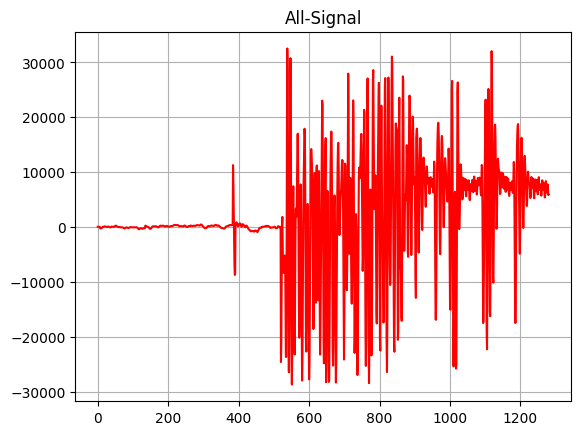

In [13]:
plt.title("All-Signal")
plt.plot(ecg_signal, color="red")
plt.grid()
plt.show()


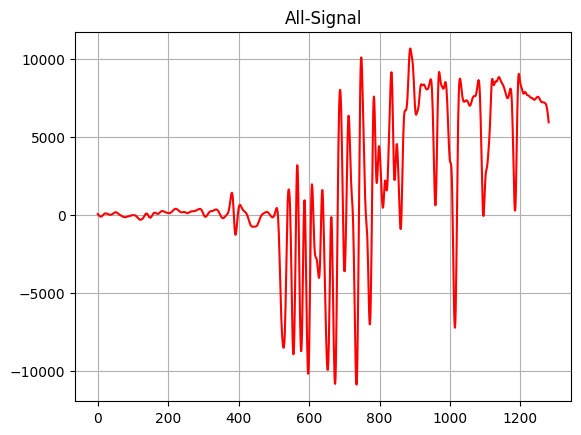

In [14]:
import heartpy as hp
filtered_ecg = hp.filter_signal(ecg_signal, cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')

plt.title("All-Signal")
plt.plot(filtered_ecg, color="red")
plt.grid()
plt.show()

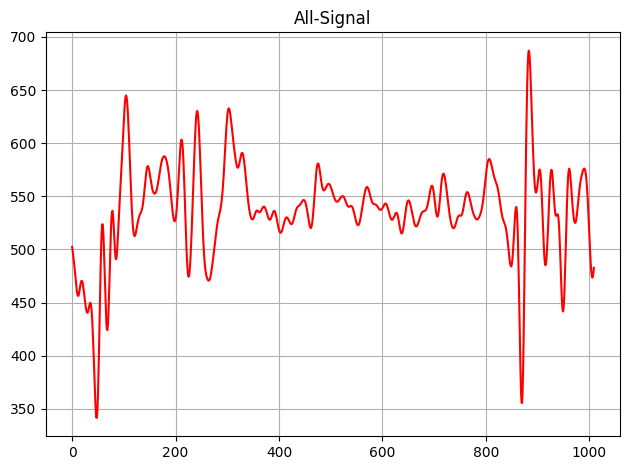

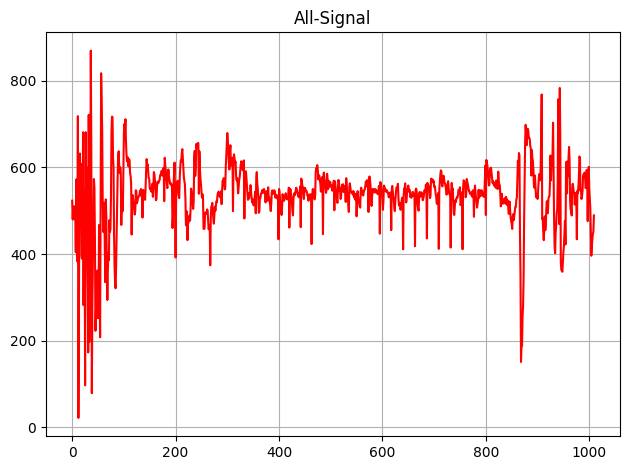

In [28]:
import heartpy as hp

ecg_signal = ["523", "480", "509", "480", "510", "490", "495", "404", "572", "474", "383", "718", "22", "258", "583", "632", "498", "608", "394", "389", "461", "681", "282", "549", "500", "97", "681", "452", "600", "418", "328", "173", "721", "197", "402", "449", "869", "644", "79", "275", "383", "490", "573", "553", "436", "223", "271", "295", "293", "362", "252", "288", "467", "355", "208", "486", "817", "750", "689", "528", "451", "456", "518", "423", "335", "526", "489", "373", "294", "365", "402", "386", "478", "451", "457", "530", "680", "717", "716", "623", "599", "445", "371", "332", "321", "376", "452", "516", "583", "629", "637", "597", "587", "600", "587", "467", "531", "499", "499", "581", "679", "700", "683", "711", "660", "630", "614", "624", "618", "602", "619", "616", "586", "580", "562", "445", "531", "536", "525", "512", "505", "491", "499", "547", "546", "517", "520", "529", "530", "534", "536", "545", "544", "550", "533", "541", "484", "548", "546", "542", "543", "525", "555", "593", "619", "604", "607", "592", "575", "573", "551", "552", "548", "544", "555", "562", "532", "551", "589", "584", "568", "555", "524", "527", "554", "567", "565", "564", "569", "570", "581", "584", "583", "592", "581", "581", "596", "599", "522", "622", "605", "593", "581", "563", "552", "576", "595", "580", "572", "567", "561", "563", "558", "558", "460", "485", "562", "582", "611", "526", "392", "529", "562", "566", "569", "547", "535", "529", "575", "601", "616", "613", "633", "642", "618", "599", "577", "568", "561", "527", "466", "469", "498", "432", "470", "473", "480", "489", "477", "504", "551", "543", "532", "517", "504", "522", "622", "638", "580", "601", "654", "646", "651", "656", "656", "539", "637", "597", "575", "562", "544", "530", "538", "529", "458", "458", "459", "494", "496", "494", "493", "503", "500", "475", "457", "466", "467", "374", "484", "509", "511", "518", "498", "480", "470", "491", "509", "500", "513", "522", "520", "536", "541", "544", "542", "533", "531", "538", "545", "515", "549", "569", "565", "575", "567", "549", "552", "600", "628", "660", "679", "662", "636", "611", "595", "637", "651", "604", "614", "615", "622", "499", "618", "630", "620", "610", "613", "579", "570", "575", "560", "540", "556", "571", "578", "591", "606", "614", "610", "599", "593", "600", "616", "482", "585", "586", "591", "575", "555", "538", "525", "540", "528", "537", "538", "559", "542", "530", "519", "526", "517", "512", "518", "533", "544", "494", "576", "589", "562", "549", "526", "495", "498", "531", "529", "539", "540", "545", "548", "541", "547", "550", "545", "539", "519", "538", "545", "534", "523", "554", "529", "531", "520", "512", "499", "516", "542", "547", "539", "539", "542", "547", "543", "530", "537", "535", "532", "527", "535", "434", "550", "544", "526", "516", "501", "490", "509", "538", "524", "526", "523", "532", "534", "540", "528", "529", "526", "530", "535", "553", "461", "539", "550", "540", "533", "516", "498", "489", "527", "538", "541", "536", "544", "553", "551", "545", "540", "535", "531", "538", "543", "556", "462", "574", "569", "558", "555", "536", "527", "542", "553", "549", "545", "546", "542", "534", "535", "523", "537", "528", "529", "538", "536", "423", "525", "549", "550", "537", "530", "526", "536", "590", "598", "597", "605", "594", "572", "582", "581", "571", "561", "544", "564", "577", "572", "446", "586", "588", "571", "568", "551", "541", "549", "585", "571", "550", "569", "561", "555", "566", "557", "558", "554", "546", "556", "560", "569", "501", "568", "560", "548", "545", "526", "518", "552", "571", "563", "546", "551", "527", "530", "552", "560", "557", "561", "543", "550", "557", "548", "520", "575", "556", "536", "532", "513", "497", "554", "563", "554", "543", "542", "540", "544", "537", "545", "531", "537", "526", "535", "539", "487", "519", "545", "531", "520", "519", "509", "507", "545", "553", "543", "546", "536", "535", "544", "548", "549", "558", "567", "556", "570", "570", "570", "497", "573", "579", "571", "557", "530", "511", "531", "550", "546", "549", "542", "545", "550", "542", "547", "542", "544", "538", "539", "557", "556", "447", "566", "558", "553", "544", "531", "502", "524", "558", "555", "551", "546", "544", "548", "544", "541", "542", "531", "531", "533", "542", "538", "455", "546", "557", "545", "532", "525", "506", "499", "525", "540", "553", "554", "556", "562", "528", "512", "514", "517", "502", "508", "521", "530", "529", "411", "533", "551", "551", "563", "544", "519", "531", "549", "550", "558", "544", "549", "546", "531", "534", "530", "533", "543", "543", "539", "534", "535", "418", "546", "551", "547", "532", "513", "505", "500", "536", "543", "532", "536", "542", "542", "534", "524", "528", "533", "547", "546", "543", "560", "554", "436", "564", "558", "559", "552", "545", "529", "534", "574", "572", "568", "572", "565", "569", "555", "557", "550", "538", "532", "516", "517", "532", "541", "412", "549", "568", "583", "593", "591", "562", "556", "577", "581", "576", "564", "563", "558", "548", "537", "542", "561", "568", "553", "540", "537", "538", "415", "544", "564", "548", "551", "522", "493", "490", "511", "524", "520", "528", "531", "530", "535", "548", "548", "549", "554", "513", "517", "542", "540", "411", "552", "570", "569", "564", "557", "531", "537", "573", "568", "562", "555", "546", "546", "540", "540", "537", "539", "543", "532", "547", "544", "486", "543", "558", "544", "529", "520", "507", "516", "525", "548", "530", "536", "547", "534", "535", "547", "538", "542", "533", "537", "532", "566", "604", "490", "617", "611", "604", "588", "575", "558", "560", "597", "598", "599", "587", "575", "564", "568", "561", "558", "562", "565", "553", "570", "569", "551", "550", "590", "569", "560", "559", "532", "510", "521", "539", "520", "516", "521", "526", "527", "529", "516", "532", "528", "513", "524", "514", "493", "493", "521", "500", "485", "475", "470", "458", "485", "492", "478", "489", "499", "509", "509", "526", "530", "577", "615", "594", "633", "628", "447", "354", "151", "189", "189", "256", "279", "344", "477", "579", "660", "698", "672", "651", "677", "689", "685", "668", "668", "664", "648", "644", "581", "640", "620", "615", "594", "558", "553", "581", "557", "531", "534", "537", "527", "545", "567", "584", "584", "570", "597", "670", "768", "481", "482", "452", "432", "456", "487", "455", "469", "506", "522", "496", "494", "526", "532", "533", "564", "627", "570", "607", "612", "633", "703", "580", "479", "416", "402", "449", "467", "493", "503", "564", "757", "536", "469", "783", "662", "380", "363", "362", "359", "381", "405", "418", "446", "477", "422", "579", "613", "540", "613", "579", "626", "647", "611", "523", "502", "502", "489", "552", "562", "552", "544", "539", "514", "535", "541", "522", "434", "546", "540", "556", "581", "625", "621", "546", "550", "527", "534", "545", "580", "584", "584", "588", "574", "552", "557", "594", "582", "476", "578", "601", "552", "528", "506", "453", "396", "420", "435", "447", "451", "489"]

ecg = []
for i in ecg_signal:
  ecg.append(int(i))

ecg = np.array(ecg)


filtered_ecg = hp.filter_signal(ecg, cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')

plt.title("All-Signal")
plt.plot(filtered_ecg, color="red")
plt.grid()
plt.show()

plt.title("All-Signal")
plt.plot(ecg, color="red")
plt.grid()
plt.show()

ecg_signal = ecg

In [29]:
from tensorflow.keras.models import load_model

model_name = ["model_1.h5", "model_2.h5", "model_3.hdf5", "model_4.hdf5"]

model = load_model('/content/drive/MyDrive/Colaboratory_Datasset/ECG_DATA_J/Models/' + model_name[2])


[[523 480 509 480 510 490 495 404 572 474 383 718  22 258 583 632 498 608
  394 389 461 681 282 549 500  97 681 452 600 418 328 173 721 197 402 449
  869 644  79 275 383 490 573 553 436 223 271 295 293 362 252 288 467 355
  208 486 817 750 689 528 451 456 518 423 335 526 489 373 294 365 402 386
  478 451 457 530 680 717 716 623 599 445 371 332 321 376 452 516 583 629
  637 597 587 600 587 467 531 499 499 581 679 700 683 711 660 630 614 624
  618 602 619 616 586 580 562 445 531 536 525 512 505 491 499 547 546 517
  520 529 530 534 536 545 544 550 533 541 484 548 546 542 543 525 555 593
  619 604 607 592 575 573 551 552 548 544 555 562 532 551 589 584 568 555
  524 527 554 567 565 564 569 570 581 584 583 592 581 581 596 599 522 622
  605 593 581 563 552 576 595]]


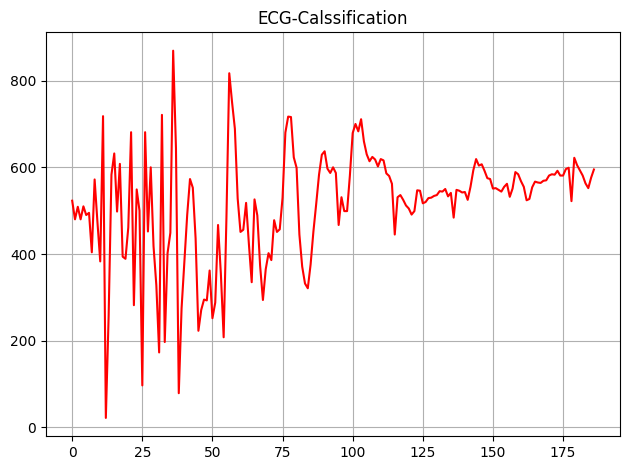

1/1 [==============================] - 0s 493ms/step
Validation ECG: [[1.]]
[[580 572 567 561 563 558 558 460 485 562 582 611 526 392 529 562 566 569
  547 535 529 575 601 616 613 633 642 618 599 577 568 561 527 466 469 498
  432 470 473 480 489 477 504 551 543 532 517 504 522 622 638 580 601 654
  646 651 656 656 539 637 597 575 562 544 530 538 529 458 458 459 494 496
  494 493 503 500 475 457 466 467 374 484 509 511 518 498 480 470 491 509
  500 513 522 520 536 541 544 542 533 531 538 545 515 549 569 565 575 567
  549 552 600 628 660 679 662 636 611 595 637 651 604 614 615 622 499 618
  630 620 610 613 579 570 575 560 540 556 571 578 591 606 614 610 599 593
  600 616 482 585 586 591 575 555 538 525 540 528 537 538 559 542 530 519
  526 517 512 518 533 544 494 576 589 562 549 526 495 498 531 529 539 540
  545 548 541 547 550 545 539]]


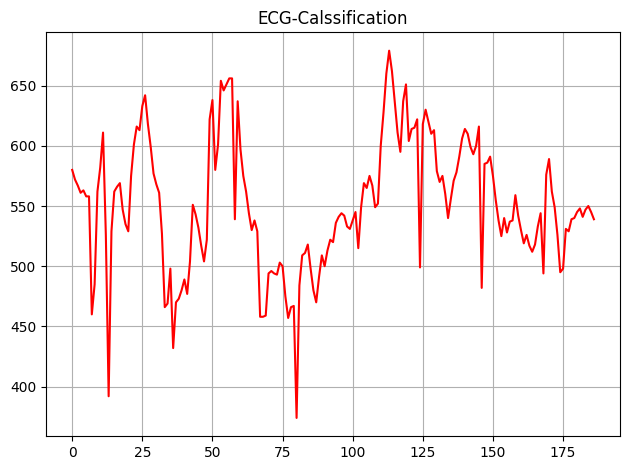

1/1 [==============================] - 0s 29ms/step
Validation ECG: [[1.]]
[[519 538 545 534 523 554 529 531 520 512 499 516 542 547 539 539 542 547
  543 530 537 535 532 527 535 434 550 544 526 516 501 490 509 538 524 526
  523 532 534 540 528 529 526 530 535 553 461 539 550 540 533 516 498 489
  527 538 541 536 544 553 551 545 540 535 531 538 543 556 462 574 569 558
  555 536 527 542 553 549 545 546 542 534 535 523 537 528 529 538 536 423
  525 549 550 537 530 526 536 590 598 597 605 594 572 582 581 571 561 544
  564 577 572 446 586 588 571 568 551 541 549 585 571 550 569 561 555 566
  557 558 554 546 556 560 569 501 568 560 548 545 526 518 552 571 563 546
  551 527 530 552 560 557 561 543 550 557 548 520 575 556 536 532 513 497
  554 563 554 543 542 540 544 537 545 531 537 526 535 539 487 519 545 531
  520 519 509 507 545 553 543]]


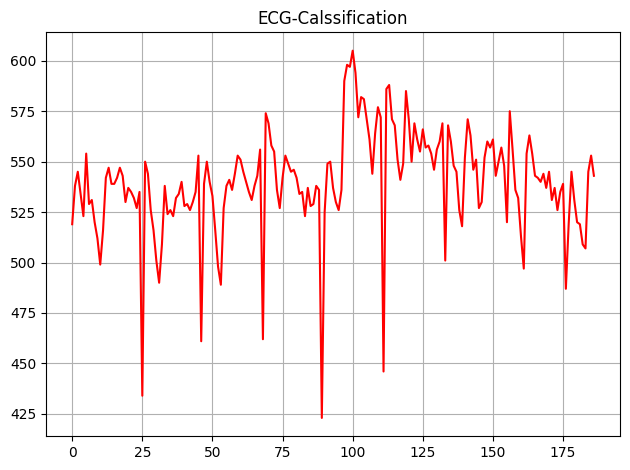

1/1 [==============================] - 0s 36ms/step
Validation ECG: [[1.]]
[[546 536 535 544 548 549 558 567 556 570 570 570 497 573 579 571 557 530
  511 531 550 546 549 542 545 550 542 547 542 544 538 539 557 556 447 566
  558 553 544 531 502 524 558 555 551 546 544 548 544 541 542 531 531 533
  542 538 455 546 557 545 532 525 506 499 525 540 553 554 556 562 528 512
  514 517 502 508 521 530 529 411 533 551 551 563 544 519 531 549 550 558
  544 549 546 531 534 530 533 543 543 539 534 535 418 546 551 547 532 513
  505 500 536 543 532 536 542 542 534 524 528 533 547 546 543 560 554 436
  564 558 559 552 545 529 534 574 572 568 572 565 569 555 557 550 538 532
  516 517 532 541 412 549 568 583 593 591 562 556 577 581 576 564 563 558
  548 537 542 561 568 553 540 537 538 415 544 564 548 551 522 493 490 511
  524 520 528 531 530 535 548]]


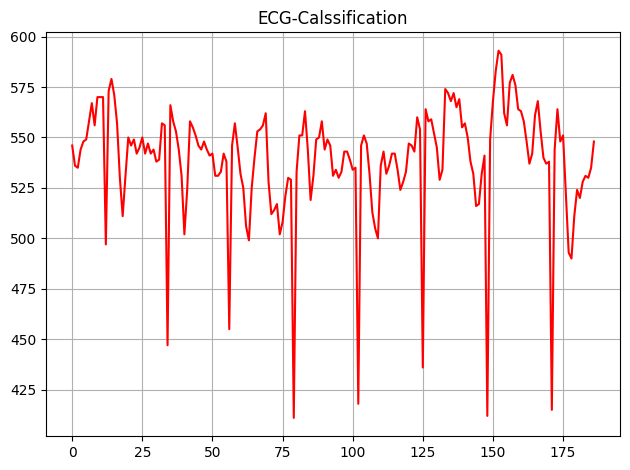

1/1 [==============================] - 0s 20ms/step
Validation ECG: [[1.]]
[[548 549 554 513 517 542 540 411 552 570 569 564 557 531 537 573 568 562
  555 546 546 540 540 537 539 543 532 547 544 486 543 558 544 529 520 507
  516 525 548 530 536 547 534 535 547 538 542 533 537 532 566 604 490 617
  611 604 588 575 558 560 597 598 599 587 575 564 568 561 558 562 565 553
  570 569 551 550 590 569 560 559 532 510 521 539 520 516 521 526 527 529
  516 532 528 513 524 514 493 493 521 500 485 475 470 458 485 492 478 489
  499 509 509 526 530 577 615 594 633 628 447 354 151 189 189 256 279 344
  477 579 660 698 672 651 677 689 685 668 668 664 648 644 581 640 620 615
  594 558 553 581 557 531 534 537 527 545 567 584 584 570 597 670 768 481
  482 452 432 456 487 455 469 506 522 496 494 526 532 533 564 627 570 607
  612 633 703 580 479 416 402]]


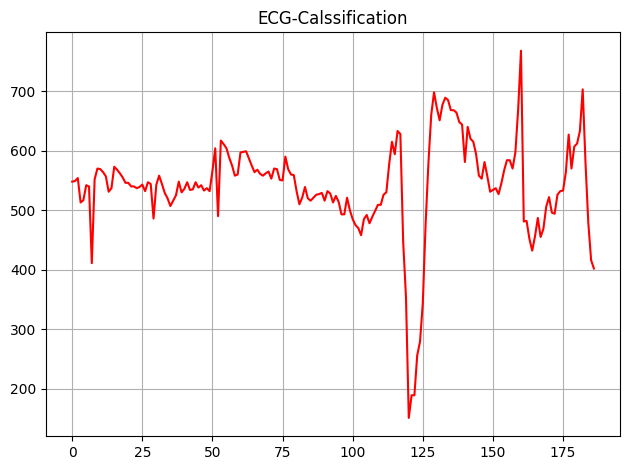

1/1 [==============================] - 0s 21ms/step
Validation ECG: [[0.]]


In [30]:
segment_size = 187

for i in range(0, len(filtered_ecg), segment_size):
    segment = ecg_signal[i:i+segment_size]

    signal_2_validate = np.array([segment])

    if len(signal_2_validate[0])==segment_size:
      print(signal_2_validate)

      plt.rcParams["figure.autolayout"] = True

      y = np.array(signal_2_validate[0])

      plt.title("ECG-Calssification")
      plt.plot(y, color="red")
      plt.grid()

      plt.show()

      ecg = model.predict(signal_2_validate)

      print("Validation ECG:", ecg)

In [31]:
a = "2024-02-22T22:04:17.316841"
print(a.split(':'))

['2024-02-22T22', '04', '17.316841']


#Resnet-Net


In [32]:
m_resnet_model = get_resnet_model(5)

m_resnet_model.load_weights('/content/drive/MyDrive/Colaboratory_Datasset/ECG_DATA_J/Models/' + model_name[3])


print(m_resnet_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 187, 1)]             0         []                            
                                                                                                  
 conv1d_11 (Conv1D)          (None, 183, 32)              192       ['input_2[0][0]']             
                                                                                                  
 conv1d_12 (Conv1D)          (None, 183, 32)              5152      ['conv1d_11[0][0]']           
                                                                                                  
 re_lu_10 (ReLU)             (None, 183, 32)              0         ['conv1d_12[0][0]']           
                                                                                            

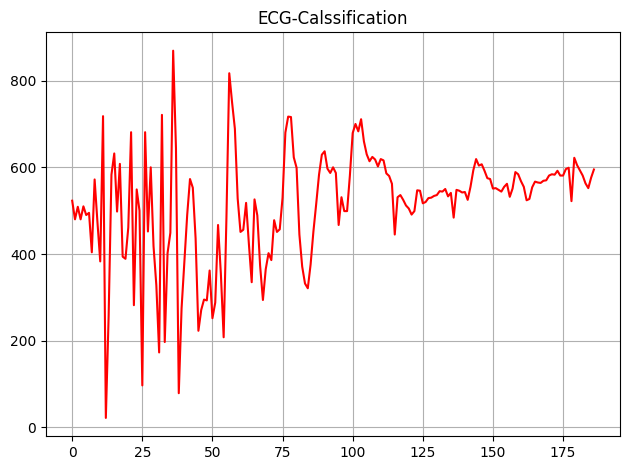

1/1 [==============================] - 0s 253ms/step
Validation ECG: [[0. 0. 0. 0. 1.]]


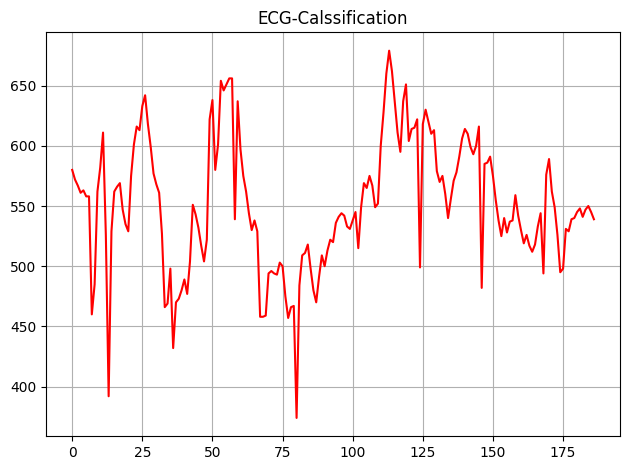

1/1 [==============================] - 0s 23ms/step
Validation ECG: [[1. 0. 0. 0. 0.]]


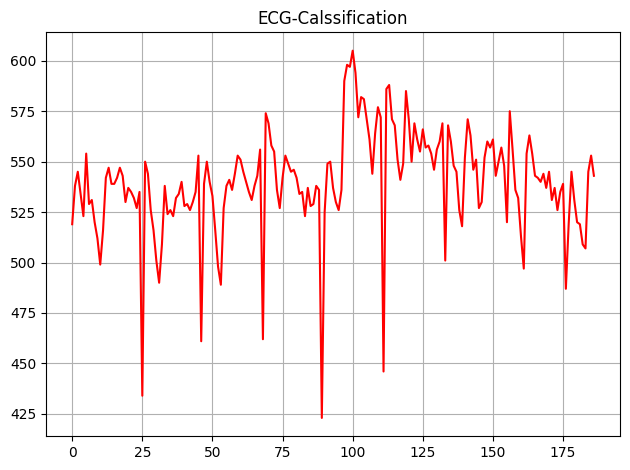

1/1 [==============================] - 0s 21ms/step
Validation ECG: [[1. 0. 0. 0. 0.]]


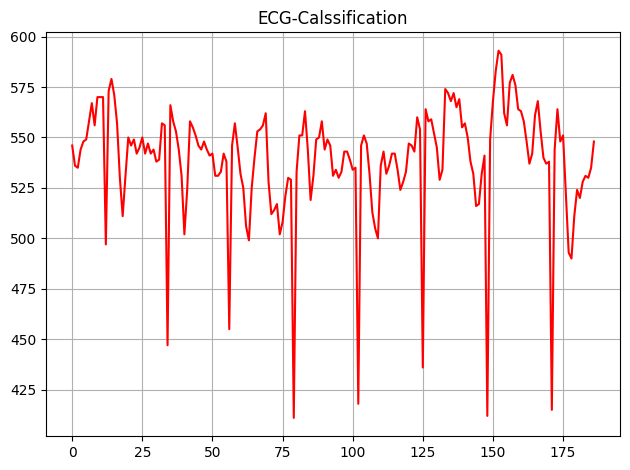

1/1 [==============================] - 0s 27ms/step
Validation ECG: [[1. 0. 0. 0. 0.]]


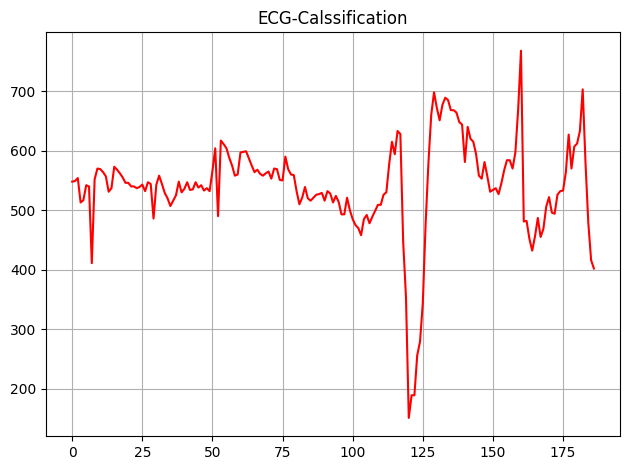

1/1 [==============================] - 0s 41ms/step
Validation ECG: [[1. 0. 0. 0. 0.]]


In [33]:
segment_size = 187

for i in range(0, len(filtered_ecg), segment_size):
    segment = ecg_signal[i:i+segment_size]

    signal_2_validate = np.array([segment])

    if len(signal_2_validate[0])==187:
      #print(signal_2_validate)

      plt.rcParams["figure.autolayout"] = True

      y = np.array(signal_2_validate[0])

      plt.title("ECG-Calssification")
      plt.plot(y, color="red")
      plt.grid()

      plt.show()

      ecg = m_resnet_model.predict(signal_2_validate)

      print("Validation ECG:", ecg)